In [1]:
import sys
if '..' not in sys.path:
    sys.path.append('..')

In [2]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import USPS

import matplotlib.pyplot as plt
import numpy as np

from source.models import AE
from source.data import get_train_test_dataloaders
from source.eval import eval_loss

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
def plot_progress(x, z):
    rows = 4
    cols = 16
    fig, ax = plt.subplots(rows, cols, sharex=True, sharey=True, figsize=(cols, rows))
    for i in range(len(x)):
        ax[i//cols, i%cols].imshow(x[i].cpu().reshape([16, 16]), 'gray')
        ax[i//cols, i%cols].set_axis_off()
    for i in range(len(z)):
        ax[i//cols+2, i%cols].imshow(z[i].detach().cpu().numpy().reshape([16, 16]), 'gray')
        ax[i//cols+2, i%cols].set_axis_off()
    plt.show()

In [4]:
train_loader, test_loader = get_train_test_dataloaders('..', 'USPS')

In [17]:
model = AE().to(device)
loss_function = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [6]:
eval_loss(model, test_loader, loss_function, device=device)

0.16142396580788396

In [ ]:
for x, _in train_loader:
    x = x.to(device)
    with torch.no_grad():
        z = model(x)
    
    plot_progress(x, z)
    
    break

In [18]:
num_params = 0
for _, param in model.named_parameters():
    num_params += param.numel()
num_params

217600

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.48 µs
epoch : 1/20, loss = 0.053361


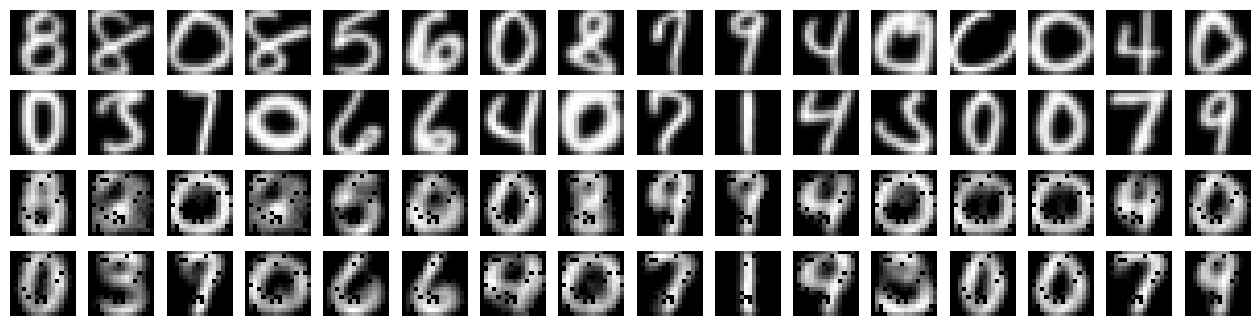

epoch : 2/20, loss = 0.024570
epoch : 3/20, loss = 0.018033
epoch : 4/20, loss = 0.015983
epoch : 5/20, loss = 0.014488
epoch : 6/20, loss = 0.012446


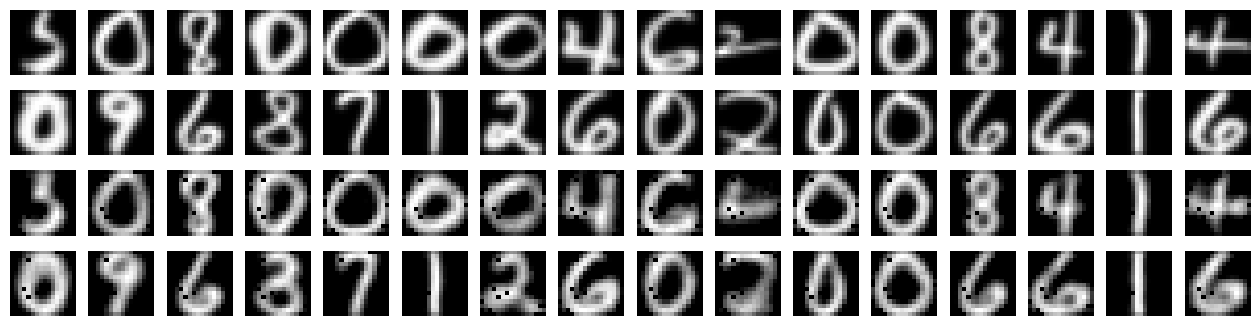

epoch : 7/20, loss = 0.011342
epoch : 8/20, loss = 0.010406
epoch : 9/20, loss = 0.009961
epoch : 10/20, loss = 0.009502
epoch : 11/20, loss = 0.008816


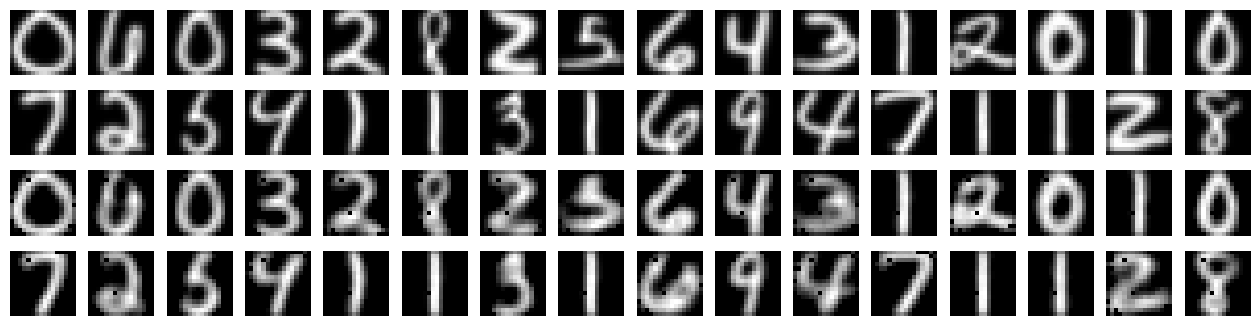

epoch : 12/20, loss = 0.008550
epoch : 13/20, loss = 0.008324
epoch : 14/20, loss = 0.008163
epoch : 15/20, loss = 0.007951
epoch : 16/20, loss = 0.007687


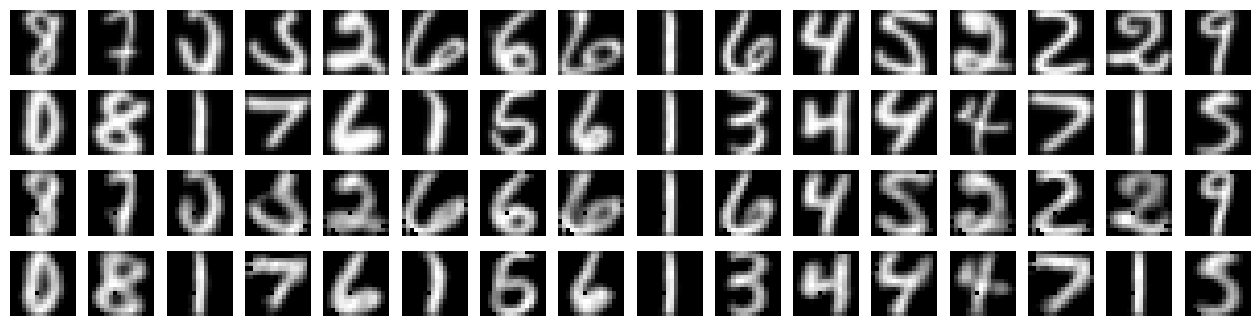

epoch : 17/20, loss = 0.006855
epoch : 18/20, loss = 0.006783
epoch : 19/20, loss = 0.006682
epoch : 20/20, loss = 0.006581


In [20]:
%time
epochs = 20
history = []
model.train()
for epoch in range(epochs):
    loss = 0
    for x, _ in train_loader:
        
        optimizer.zero_grad()
        
        x = x.to(device)
        z = model(x)
        
        train_loss = loss_function(z, x)
        
        train_loss.backward()
        
        optimizer.step()
        
        loss += train_loss.item()
    
    loss = loss / len(train_loader)
    history.append(loss)
    
#     if (epoch+1) % 20 == 0:
    print("epoch : {}/{}, loss = {:.6f}".format(epoch + 1, epochs, loss))
    if epoch % 5 == 0:
        plot_progress(x, z)

In [21]:
eval_loss(model, test_loader, loss_function, device=device)

0.007761928973899734

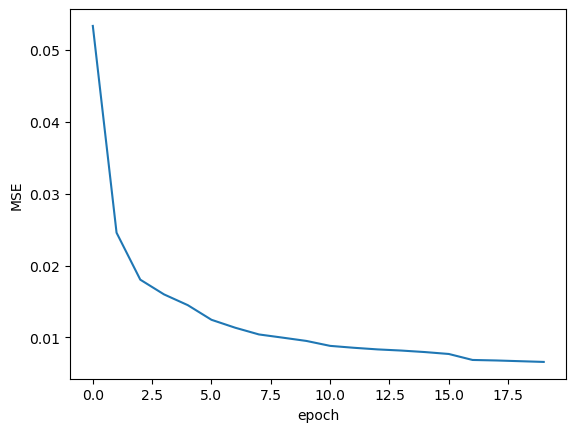

In [22]:
plt.plot(history)
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.show()

In [23]:
torch.save(model.state_dict(), f'../checkpoints/adam_usps_{epochs}ep.sd')
np.save(f'../checkpoints/adam_usps_{epochs}ep.loss', history)